# **Grid World using Q-Learning**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define the grid world
world = np.array([
[-1, -1, -1, -1],
[-1, -1, -1, -1],
[-1, -1, -1, -1],
[-1, -1, -1, 1]
])

In [ ]:
# Define the available actions (up, down, left, right)
actions = ['up', 'down', 'left', 'right']
# Define the Q-learning parameters
num_episodes = 1000
epsilon = 0.1 # exploration rate
# Define the range of gamma and alpha values to try
gamma_range = [0.1, 0.5, 0.9]
alpha_range = [0.1, 0.5, 0.9]

In [ ]:
# Loop over the gamma and alpha values
for i, gamma in enumerate(gamma_range):
  for j, alpha in enumerate(alpha_range):
    print(f"\n\nGamma={gamma}, Alpha={alpha}")
    # Initialize the Q table
    q_table = np.zeros((4, 4, len(actions)))
    # Display the initial Q table
    print("Initial Q table:")
    print(q_table)
    # Run the Q-learning algorithm
    rewards = []
    for episode in range(num_episodes):
      # Reset the environment
      state = (0, 0)
      done = False
      total_reward = 0
      while not done:
        # Choose an action using epsilon-greedy exploration
        if np.random.uniform(0, 1) < epsilon:
          action = np.random.choice(actions)
        else:
          action_idx = np.argmax(q_table[state])
          action = actions[action_idx]
        # Take the action and observe the next state and reward
        if action == 'up':
          next_state = (max(state[0] - 1, 0), state[1])
        elif action == 'down':
          next_state = (min(state[0] + 1, 3), state[1])
        elif action == 'left':
          next_state = (state[0], max(state[1] - 1, 0))
        else:
          next_state = (state[0], min(state[1] + 1, 3))
        reward = world[next_state]
        done = (reward == 1)
        total_reward += reward

        # Update the Q table
        next_action_idx = np.argmax(q_table[next_state])
        q_table[state][action_idx] += alpha * (reward + gamma * q_table[next_state][next_action_idx] - q_table[state][action_idx])

        state = next_state
      # Decay the exploration rate
      epsilon *= 0.99
      # Save the total reward for the episode
      rewards.append(total_reward)
    # Display the final Q table
    print("\n\nFinal Q table:")
    print(q_table)



Gamma=0.1, Alpha=0.1
Initial Q table:
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


Final Q table:
[[[-1.11109008 -1.11109    -1.11109145 -1.11109   ]
  [-1.11091207 -1.1109     -1.11091522 -1.1109    ]
  [-1.10911288 -1.10899998 -1.10909813 -1.10899998]
  [-1.09179891 -1.08999999 -1.09178709 -1.09010254]]

 [[-1.11090868 -1.1109     -1.11091403 -1.1109    ]
  [-1.1091312  -1.109      -1.1091637  -1.10917869]
  [-1.09030271 -1.08999991 -1.09097139 -1.08999991]
  [-0.91846618 -0.9        -0.90879506 -0.9006568 ]]

 [[-1.10910121 -1.10900017 -1.10902172 -1.10899999]
  [-1.09112855 -1.09004571 -1.09143809 -1.09      ]
  [-0.90603686 -0.90209    -0.90708017 -0.9       ]
  [-0.1         1.          0.          0.09770815]]

 [[-1.09068583 -1.0915403  -1.09179383 -1.0900507

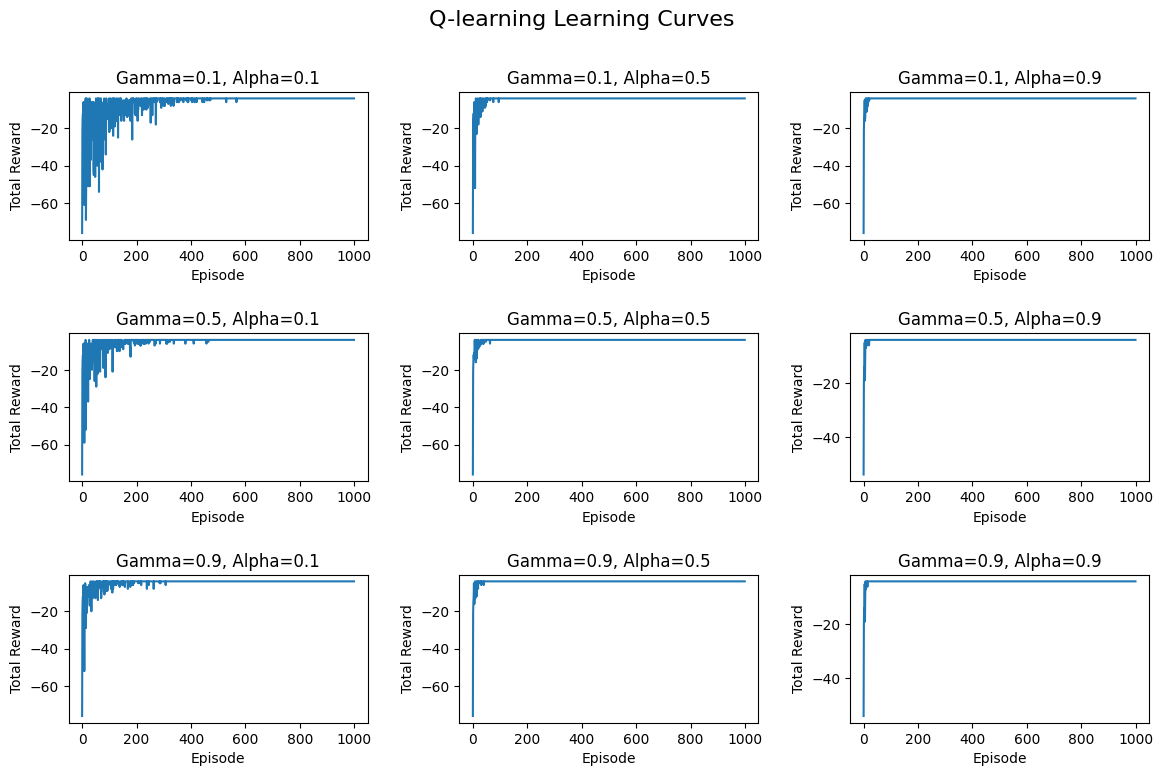

In [ ]:
# Initialize the figure
fig, ax = plt.subplots(len(gamma_range), len(alpha_range), figsize=(12, 8))
fig.suptitle('Q-learning Learning Curves', fontsize=16)
# Loop over the gamma and alpha values
for i, gamma in enumerate(gamma_range):
    for j, alpha in enumerate(alpha_range):
      # Initialize the Q table
      q_table = np.zeros((4, 4, len(actions)))
      # Run the Q-learning algorithm
      rewards = []
      for episode in range(num_episodes):
        # Reset the environment
        state = (0, 0)
        done = False
        total_reward = 0
        while not done:
          # Choose an action using epsilon-greedy exploration
          if np.random.uniform(0, 1) < epsilon:
            action = np.random.choice(actions)
          else:
            action_idx = np.argmax(q_table[state])
            action = actions[action_idx]
          # Take the action and observe the next state and reward
          if action == 'up':
            next_state = (max(state[0] - 1, 0), state[1])
          elif action == 'down':
            next_state = (min(state[0] + 1, 3), state[1])
          elif action == 'left':
            next_state = (state[0], max(state[1] - 1, 0))
          else:
            next_state = (state[0], min(state[1] + 1, 3))
          reward = world[next_state]
          done = (reward == 1)
          total_reward += reward

          # Update the Q table
          next_action_idx = np.argmax(q_table[next_state])
          q_table[state][action_idx] += alpha * (reward + gamma * q_table[next_state][next_action_idx] - q_table[state][action_idx])

          state = next_state
        # Decay the exploration rate
        epsilon *= 0.99
        # Save the total reward for the episode
        rewards.append(total_reward)
      # Plot the learning curve
      ax[i, j].plot(rewards)
      ax[i, j].set_title(f"Gamma={gamma}, Alpha={alpha}")
      ax[i, j].set_xlabel('Episode')
      ax[i, j].set_ylabel('Total Reward')
# Adjust the spacing between the subplots
fig.tight_layout(pad=2.0)
# Show the plot
plt.show()